In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os, struct

from scipy import interpolate

In [23]:
"""
Directory to a .img file.
"""

grid_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/Empty"
# grid_dir = "turbulence"
grid_file = os.path.join(grid_dir,"rho0.dbl")
os.path.exists(grid_file)

True

In [24]:
"""
Dimensions of the inflaton field (and its time derivative).
You need to know this beforehand.
"""

domain_dimensions = (200,)*2

In [37]:
"""
Read .img file.
"""

n_points = np.prod(domain_dimensions)
with open(grid_file,'rb') as grid:
    
    grid_content = grid.read()
    # idx, = struct.unpack("i" * 1, grid_content[:4])
    # t_start, = struct.unpack("f" * 1, grid_content[4:8])
    # a, = struct.unpack("f" * 1, grid_content[8:12])
    # ap, = struct.unpack("f" * 1, grid_content[12:16])
    
    rho = struct.unpack("d"*n_points, grid_content[:8*n_points])
    # phip = struct.unpack("f" * n_points, grid_content[16+4*n_points:])

    print(len(grid_content))

320000


In [38]:
rho = np.reshape(rho, domain_dimensions)

In [39]:
rho.shape

(200, 200)

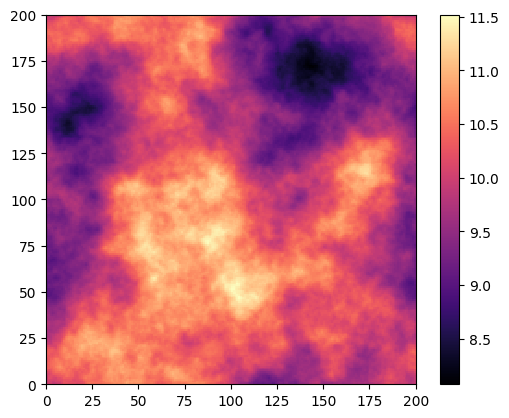

In [40]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(rho, cmap='magma')
ax.set_aspect('equal')

fig.colorbar(im,)



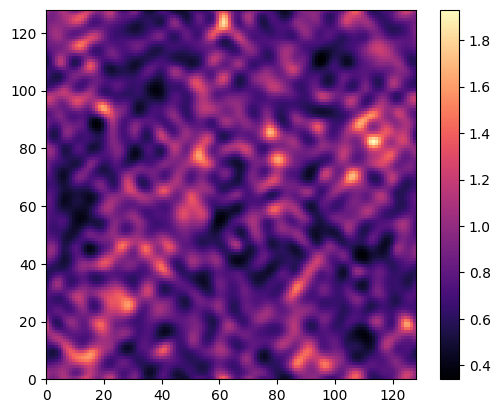

In [78]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(rho, cmap='magma')
ax.set_aspect('equal')

fig.colorbar(im,)



In [119]:
output_dir = "/home/yangelaxue/Documents/VUW/clusters/TurboGenPY/"

# shape = (32,32,32)
shape = (128,128,128)

velocity_txt = f"{'{}'}_cbc_{shape[0]}.{shape[1]}.{shape[2]}_100_modes.txt"

# vx1 = np.loadtxt(os.path.join(output_dir,velocity_txt.format("u")), skiprows=2).reshape(shape)
# vx2 = np.loadtxt(os.path.join(output_dir,velocity_txt.format("v")), skiprows=2).reshape(shape)
# vx3 = np.loadtxt(os.path.join(output_dir,velocity_txt.format("w")), skiprows=2).reshape(shape)

vx1 = np.loadtxt(os.path.join(output_dir,"u.txt"), skiprows=2).reshape(shape)
vx2 = np.loadtxt(os.path.join(output_dir,"v.txt"), skiprows=2).reshape(shape)
vx3 = np.loadtxt(os.path.join(output_dir,"w.txt"), skiprows=2).reshape(shape)

X, Y, Z = np.meshgrid(*[np.linspace(-.5,.5,_shape) for _shape in shape], indexing='xy')

In [120]:
v = (vx1**2 + vx2**2 + vx3**2)**.5

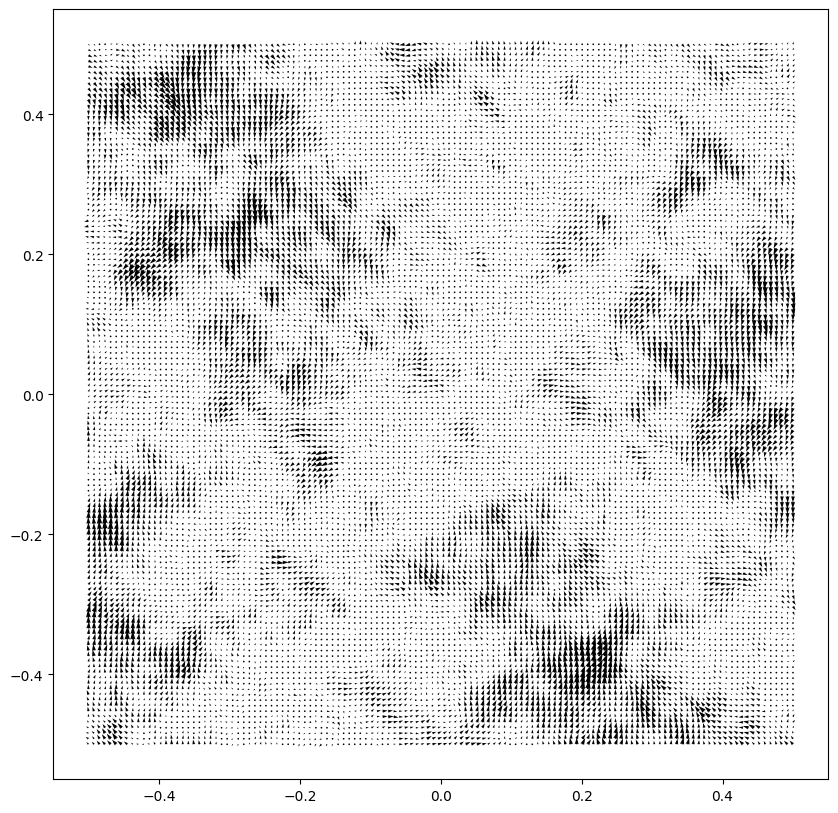

In [122]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

slc = 64

ax.quiver(X[16], Z[16], vx1[slc], vx3[slc])

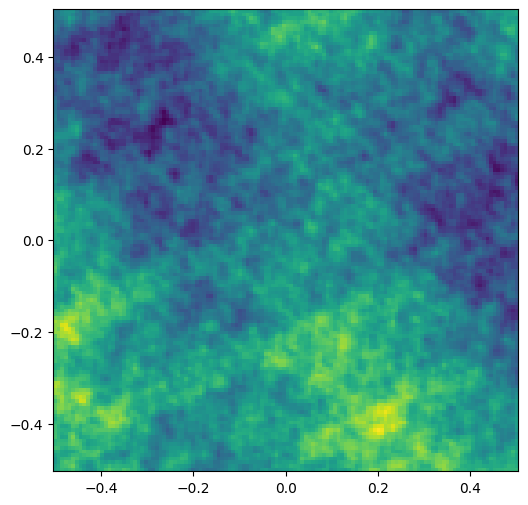

In [123]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.pcolormesh(X[16], Z[16], vx3[slc])


In [83]:
cbcspec = np.loadtxt(os.path.join(output_dir,'cbc_spectrum.txt'))
kcbc = cbcspec[:, 0] * 100
ecbc = cbcspec[:, 1] * 1e-6
especf = interpolate.interp1d(kcbc, ecbc, 'cubic')

In [87]:
x = np.linspace(1e-6,0.565,32)
k = 2*np.pi/x

In [62]:
def karman_spec(k):
    nu = 1.0e-5
    alpha = 1.452762113
    urms = 0.25
    ke = 40.0
    kappae = np.sqrt(5.0 / 12.0) * ke
    L = 0.746834 / kappae  # integral length scale - sqrt(Pi)*Gamma(5/6)/Gamma(1/3)*1/ke
    #  L = 0.05 # integral length scale
    #  Kappae = 0.746834/L
    epsilon = urms * urms * urms / L
    kappaeta = pow(epsilon, 0.25) * pow(nu, -3.0 / 4.0)
    r1 = k / kappae
    r2 = k / kappaeta
    espec = alpha * urms * urms / kappae * pow(r1, 4) / pow(1.0 + r1 * r1, 17.0 / 6.0) * np.exp(-2.0 * r2 * r2)
    return espec

In [68]:
def power_spec(k):
    Nu = 1 * 1e-3
    L = 0.1
    Li = 1
    ch = 1
    cl = 10
    p0 = 8
    c0 = pow(10, 2)
    Beta = 2
    Eta = Li / 20.0
    ES = Nu * Nu * Nu / (Eta * Eta * Eta * Eta)
    x = k * Eta
    fh = np.exp(-Beta * pow(pow(x, 4) + pow(ch, 4), 0.25) - ch)
    x = k * L
    fl = pow(x / pow(x * x + cl, 0.5), 5.0 / 3.0 + p0)
    espec = c0 * pow(k, -5.0 / 3.0) * pow(ES, 2.0 / 3.0) * fl * fh
    return espec

In [66]:
k

array([ -11.12068196,  -11.88762554,  -12.7681904 ,  -13.78964563,
        -14.98874525,  -16.4162448 ,  -18.14427057,  -20.27889063,
        -22.98274272,  -26.51854929,  -31.3401037 ,  -38.30457119,
        -49.24873439,  -68.94822815, -114.91371358, -344.74114075,
        344.74114075,  114.91371358,   68.94822815,   49.24873439,
         38.30457119,   31.3401037 ,   26.51854929,   22.98274272,
         20.27889063,   18.14427057,   16.4162448 ,   14.98874525,
         13.78964563,   12.7681904 ,   11.88762554,   11.12068196])

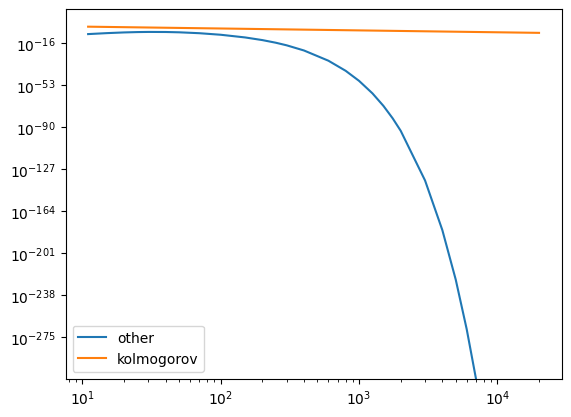

In [101]:
# plt.plot(kcbc, ecbc, label="cbc")
# plt.plot(kcbc, especf(kcbc), label="cbc int")
# plt.plot(kcbc, karman_spec(kcbc), label="karman")
plt.plot(kcbc, power_spec(kcbc), label="other")
plt.plot(kcbc, kcbc**(-5/3), label="kolmogorov")

plt.yscale('log')
plt.xscale('log')

plt.legend()


In [99]:
np.savetxt(os.path.join(output_dir,'kolmogorov.txt'),np.array([kcbc/100,1e6*kcbc**(-5/3)]).T)
help(np.savetxt)

Help on _ArrayFunctionDispatcher in module numpy:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
    Save an array to a text file.

    Parameters
    ----------
    fname : filename, file handle or pathlib.Path
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : 1D or 2D array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:

        * a single specifier, ``fmt='%.4e'``, resulting in numbers formatted
          like ``' (%s+%sj)' % (fmt, fmt)``
        * a full string specifying every real and imaginary part, e.g.
          ``' %.4e %+.